In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Feature preparation

**[Link to the source dataset](https://www.openml.org/search?type=data&status=active&id=40975&sort=runs)**

The model evaluates cars according to the following concept structure:
             
- **buying**: buying price
- **maint**: price of the maintenance
- **doors**: number of doors
- **persons**: capacity in terms of persons to carry
- **lug_boot**: the size of luggage boot
- **safety**: estimated safety of the car
- **class**: car acceptability - *target feature for binary classification* 

In [2]:
cars_data = fetch_openml(data_id=40975, as_frame=True, parser="pandas")
cars_df = cars_data.data.join(cars_data.target)
cars_df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
#number of non-unique classes for each feature
cars_df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

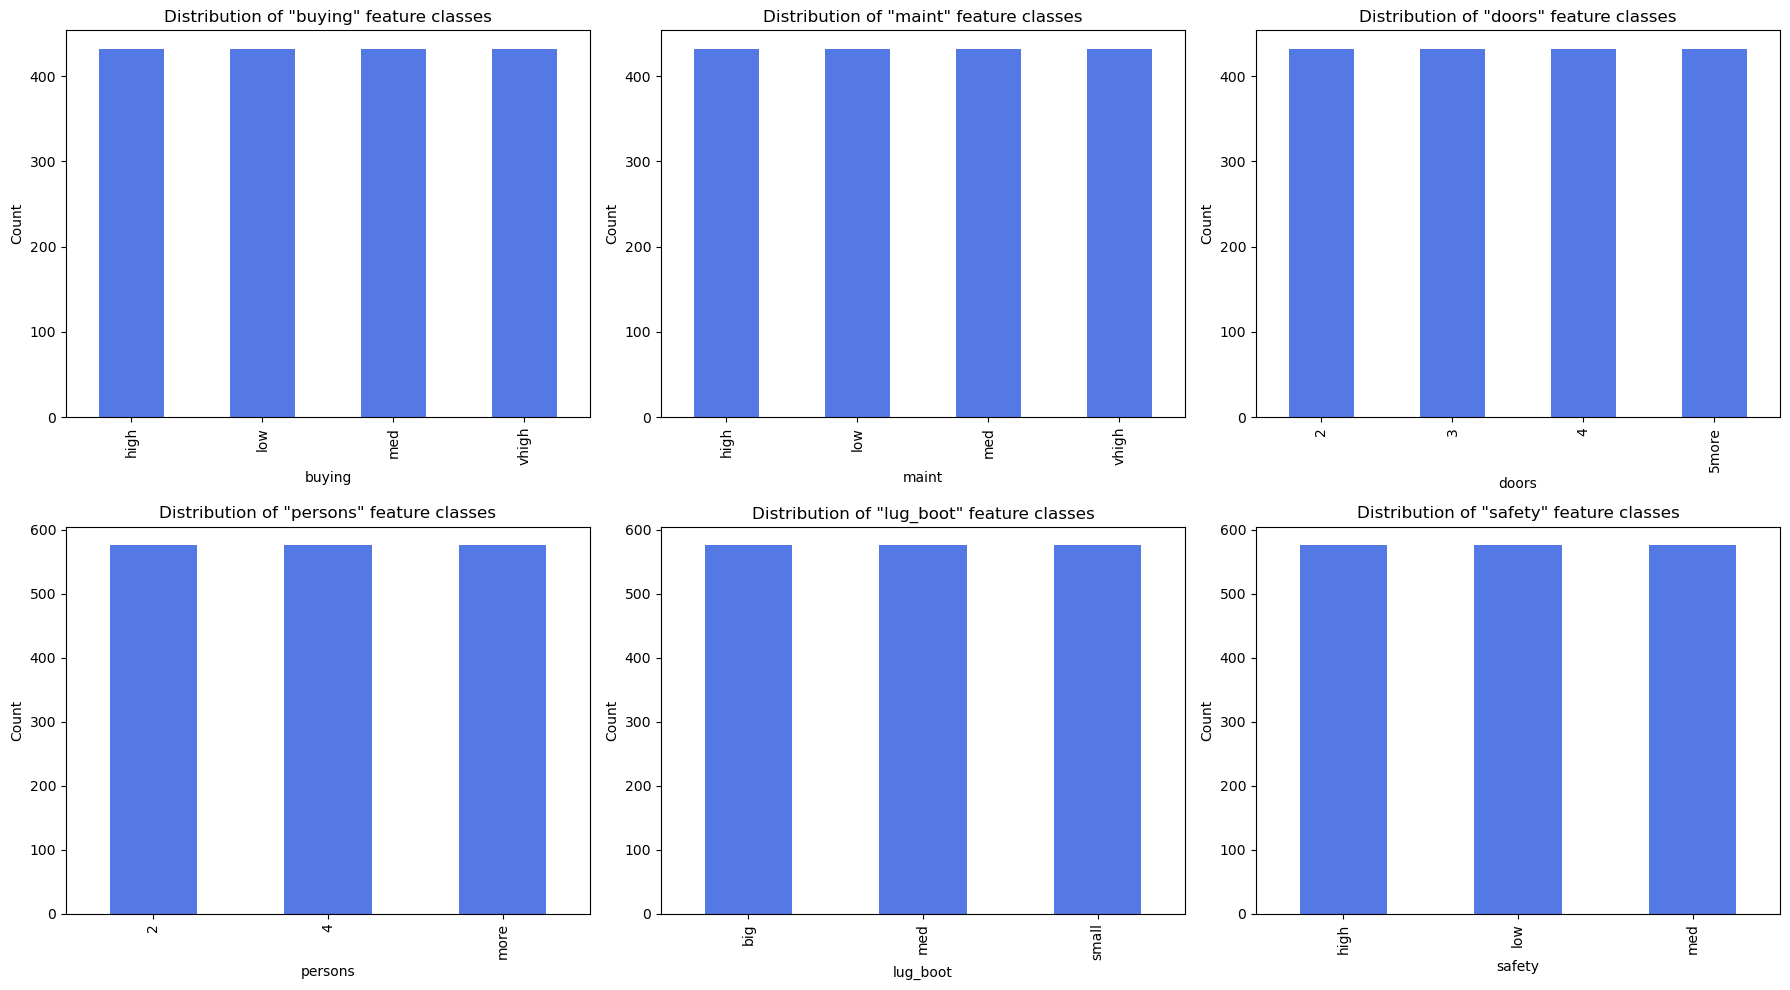

In [4]:
features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Setting plots settings
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Histogram for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    cars_df[feature].value_counts().sort_index().plot(
        kind='bar', ax=ax, color='royalblue', alpha=0.9)
    
    ax.set_title(f'Distribution of "{feature}" feature classes')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


Given that all features exhibit a uniform distribution, we can reasonably conclude that all values contribute equally to the representation of the data. Therefore, in the binarized version of our dataset, we will partition each feature into two categories: values greater than or equal to a threshold and values less than or equal to a threshold. This approach ensures that the dataset retains a balanced and meaningful representation of the feature space.

## Target feature binarization

In [5]:
cars_df["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

We work with binary classification method, so we need to leave only two classes for target feature. So it is decided to leave "unacc" values unchanged and all other values replace with "acc" class.

In [6]:
cars_df['class'] = np.where(cars_df['class'] != "unacc", 1, 0)
cars_df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,1
1724,low,low,5more,more,med,high,1
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,1


In [7]:
cars_df["class"].value_counts()

class
0    1210
1     518
Name: count, dtype: int64

## Feature binarization

In [8]:
# Mapping each values
ordinal_mappings = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'doors': ['2', '3', '4', '5more'],
    'persons': ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety': ['low', 'med', 'high']
}

# function for feature binarization
def binary_encode_feature(df, feature, values):
    for i, value in enumerate(values):
        # Adding tho new columns for each feature: >=value и <=value
        df[f'{feature}≥{value}'] = df[feature].apply(lambda x: values.index(x) >= i).astype(int)
        df[f'{feature}≤{value}'] = df[feature].apply(lambda x: values.index(x) <= i).astype(int)

# Binarized dataset
binary_encoded_df = cars_df.copy()

for feature, values in ordinal_mappings.items():
    binary_encode_feature(binary_encoded_df, feature, values)

binary_encoded_df.drop(columns=ordinal_mappings.keys(), inplace=True)

In [9]:
print(binary_encoded_df.columns)
# Final result
binary_encoded_df.head()

Index(['class', 'buying≥low', 'buying≤low', 'buying≥med', 'buying≤med',
       'buying≥high', 'buying≤high', 'buying≥vhigh', 'buying≤vhigh',
       'maint≥low', 'maint≤low', 'maint≥med', 'maint≤med', 'maint≥high',
       'maint≤high', 'maint≥vhigh', 'maint≤vhigh', 'doors≥2', 'doors≤2',
       'doors≥3', 'doors≤3', 'doors≥4', 'doors≤4', 'doors≥5more',
       'doors≤5more', 'persons≥2', 'persons≤2', 'persons≥4', 'persons≤4',
       'persons≥more', 'persons≤more', 'lug_boot≥small', 'lug_boot≤small',
       'lug_boot≥med', 'lug_boot≤med', 'lug_boot≥big', 'lug_boot≤big',
       'safety≥low', 'safety≤low', 'safety≥med', 'safety≤med', 'safety≥high',
       'safety≤high'],
      dtype='object')


,class,buying≥low,buying≤low,buying≥med,buying≤med,buying≥high,buying≤high,buying≥vhigh,buying≤vhigh,maint≥low,...,lug_boot≥med,lug_boot≤med,lug_boot≥big,lug_boot≤big,safety≥low,safety≤low,safety≥med,safety≤med,safety≥high,safety≤high
0,0,1,0,1,0,1,0,1,1,1,...,0,1,0,1,1,1,0,1,0,1
1,0,1,0,1,0,1,0,1,1,1,...,0,1,0,1,1,0,1,1,0,1
2,0,1,0,1,0,1,0,1,1,1,...,0,1,0,1,1,0,1,0,1,1
3,0,1,0,1,0,1,0,1,1,1,...,1,1,0,1,1,1,0,1,0,1
4,0,1,0,1,0,1,0,1,1,1,...,1,1,0,1,1,0,1,1,0,1


# Data separation

In [10]:
from sklearn.model_selection import train_test_split

X = binary_encoded_df.drop(columns=['class'])
y = binary_encoded_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1382, 42)
(346, 42)


# Model definition and training

In [12]:
from itertools import combinations
from typing import List, Union

class LazyHypothesesClassifier:
    def __init__(self, max_features: int = 3, threshold: float = 0.5):
        """
        Classifier initialisation
        
        :param max_features: Maximum number of features for a hypothesis (default 3)
        :param threshold: Classification threshold (default 0.5)
        """
        self.max_features = max_features
        self.threshold = threshold
        self.positive_hypotheses = []
        self.negative_hypotheses = []
        self.feature_names = None
        self.target_name = None

    def find_hypotheses(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Finding all positive and negative hypotheses, starting with the largest combinations.
        
        :param X: Features
        :param y: Target values
        """
        self.positive_hypotheses = []
        self.negative_hypotheses = []
    
        for n_features in range(self.max_features, 0, -1):
            for feature_combination in combinations(range(X.shape[1]), n_features):
                pos_mask = np.all(X[:, feature_combination] == 1, axis=1)
                pos_indices = np.where(pos_mask)[0]
                
                if len(pos_indices) > 0 and np.all(y[pos_indices] == 1):
                    if not any(set(hyp).issubset(feature_combination) for hyp in self.positive_hypotheses):
                        self.positive_hypotheses.append(feature_combination)
    
                neg_mask = np.all(X[:, feature_combination] == 1, axis=1)
                neg_indices = np.where(neg_mask)[0]
                
                if len(neg_indices) > 0 and np.all(y[neg_indices] == 0):
                    if not any(set(hyp).issubset(feature_combination) for hyp in self.negative_hypotheses):
                        self.negative_hypotheses.append(feature_combination)



    def fit(self, X: Union[pd.DataFrame, np.ndarray], y: Union[pd.Series, np.ndarray]) -> 'BinaryFeatureHypothesisClassifier':
        """
        Fitting with values
        
        :param X: Features for training
        :param y: Target values
        :return: Ready classifier
        """
        if isinstance(X, pd.DataFrame):
            self.feature_names = list(X.columns)
            X_array = X.values
        else:
            X_array = X
            self.feature_names = [f'feature_{i}' for i in range(X_array.shape[1])]
        
        if isinstance(y, pd.Series):
            self.target_name = y.name
            y_array = y.values
        else:
            y_array = y
            self.target_name = 'target'
        
        if X_array.shape[0] != y_array.shape[0]:
            raise ValueError("Shapes of X and y don't match")
        
        self.find_hypotheses(X_array, y_array)
        
        return self

    def predict(self, X: Union[pd.DataFrame, np.ndarray]) -> pd.Series:
        """
        Classification of objects
        
        :param X: Features for predicting
        :return: resulting values of classification
        """
        if isinstance(X, pd.DataFrame):
            X_array = X.values
            original_index = X.index
        else:
            X_array = X
            original_index = pd.RangeIndex(len(X_array))
        
        predictions = np.zeros(X_array.shape[0], dtype=int)
        
        for i, row in enumerate(X_array):
            pos_hypothesis_count = sum(
                np.all(row[list(hyp)] == 1) for hyp in self.positive_hypotheses
            )
            
            neg_hypothesis_count = sum(
                np.all(row[list(hyp)] == 1) for hyp in self.negative_hypotheses
            )
            
            total_hypothesis = pos_hypothesis_count + neg_hypothesis_count
            predictions[i] = 1 if (pos_hypothesis_count >= neg_hypothesis_count and pos_hypothesis_count >= total_hypothesis * self.threshold) else 0
        
        return pd.Series(predictions, index=original_index, name=self.target_name)

In [13]:
classifier = LazyHypothesesClassifier(threshold=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Metrics

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
specificity = tn / (tn + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fdr = fp / (fp + tp)

In [17]:
print(f"True Positive: {tp}")
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (True Positive Rate): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Negative Predictive Value: {npv:.2f}")
print(f"False Positive Rate: {fpr:.2f}")
print(f"False Discovery Rate: {fdr:.2f}")

True Positive: 104
True Negative: 237
False Positive: 5
False Negative: 0
Accuracy: 0.99
Precision: 0.95
Recall (True Positive Rate): 1.00
F1 Score: 0.98
Specificity (True Negative Rate): 0.98
Negative Predictive Value: 1.00
False Positive Rate: 0.02
False Discovery Rate: 0.05


# Comparison with other models

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import time
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [19]:
models = {
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7, 9]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Logistic Regression": (LogisticRegression(max_iter=1000), {"C": [0.1, 1, 10]}),
    "SVM": (SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [None, 10, 20, 30]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric="logloss"), {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}),
    "LazyHypothesesClassifier": (LazyHypothesesClassifier(threshold=0), {})
}

In [20]:
metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": []
}
training_times = []
prediction_times = []
model_names = []

In [21]:
for name, (model, params) in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    
    if params:
        grid = GridSearchCV(model, params, cv=3, scoring="accuracy")
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    train_time = time.time() - start_time
    start_time = time.time()
    y_pred = best_model.predict(X_test)
    pred_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    model_names.append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    metrics["ROC AUC"].append(roc_auc)
    training_times.append(train_time)
    prediction_times.append(pred_time)
    
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")
    print(f"Training time: {train_time:.2f}s, Prediction time: {pred_time:.2f}s")

Training KNN...
KNN - Accuracy: 0.98, Precision: 0.96, Recall: 0.96, F1 Score: 0.96, ROC AUC: 0.97
Training time: 0.47s, Prediction time: 0.03s
Training Naive Bayes...
Naive Bayes - Accuracy: 0.84, Precision: 0.65, Recall: 1.00, F1 Score: 0.79, ROC AUC: 0.88
Training time: 0.00s, Prediction time: 0.00s
Training Logistic Regression...
Logistic Regression - Accuracy: 0.96, Precision: 0.91, Recall: 0.95, F1 Score: 0.93, ROC AUC: 0.96
Training time: 0.12s, Prediction time: 0.00s
Training SVM...
SVM - Accuracy: 0.99, Precision: 0.98, Recall: 1.00, F1 Score: 0.99, ROC AUC: 1.00
Training time: 1.31s, Prediction time: 0.01s
Training Decision Tree...
Decision Tree - Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1 Score: 0.99, ROC AUC: 0.99
Training time: 0.12s, Prediction time: 0.00s
Training Random Forest...
Random Forest - Accuracy: 0.98, Precision: 0.95, Recall: 0.99, F1 Score: 0.97, ROC AUC: 0.98
Training time: 5.51s, Prediction time: 0.01s
Training XGBoost...
XGBoost - Accuracy: 1.00, Pr

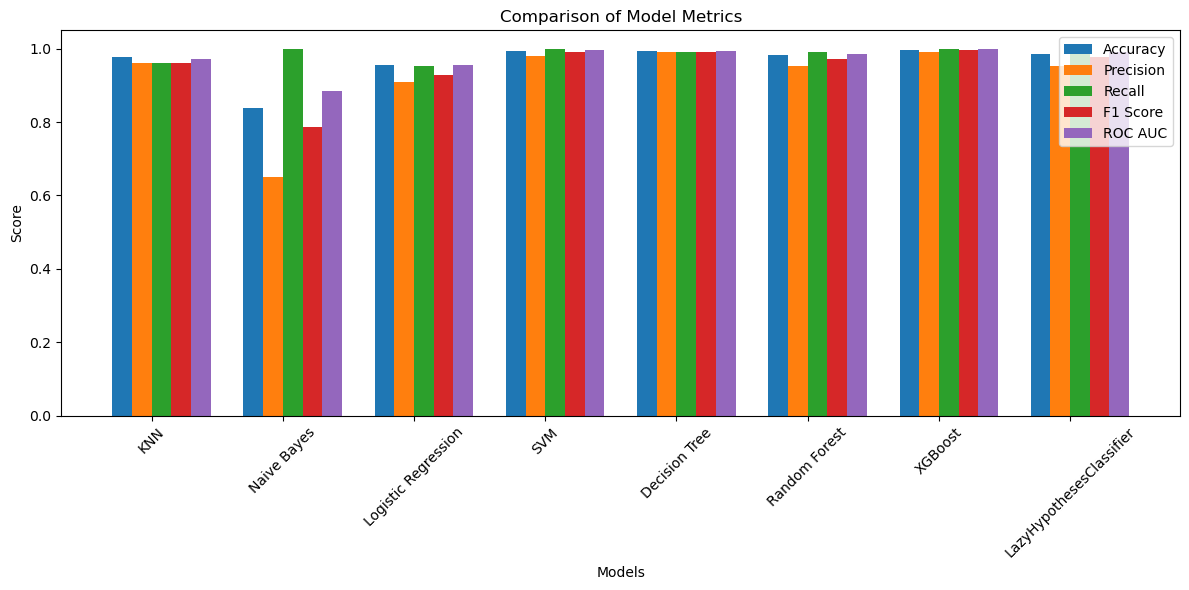

In [24]:
plt.figure(figsize=(12, 6))
x = range(len(model_names))
bar_width = 0.15
for i, metric in enumerate(metrics.keys()):
    plt.bar([p + bar_width * i for p in x], metrics[metric], width=bar_width, label=metric)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Model Metrics")
plt.xticks([p + 1.5 * bar_width for p in x], model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

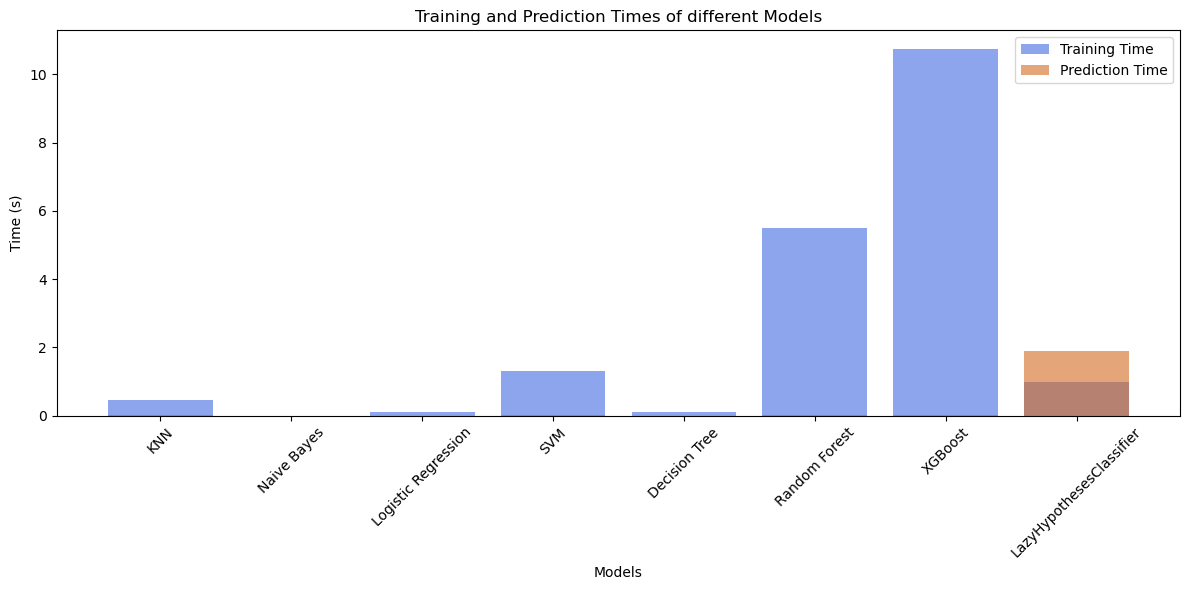

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(model_names, training_times, color='royalblue', alpha=0.6, label="Training Time")
plt.bar(model_names, prediction_times, color='chocolate', alpha=0.6, label="Prediction Time")
plt.xlabel("Models")
plt.ylabel("Time (s)")
plt.title("Training and Prediction Times of different Models")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": metrics["Accuracy"],
    "Precision": metrics["Precision"],
    "Recall": metrics["Recall"],
    "F1 Score": metrics["F1 Score"],
    "ROC AUC": metrics["ROC AUC"],
    "Training Time (s)": training_times,
    "Prediction Time (s)": prediction_times
})

In [28]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Training Time (s),Prediction Time (s)
0,KNN,0.976879,0.961538,0.961538,0.961538,0.972505,0.465597,0.026921
1,Naive Bayes,0.838150,0.650000,1.000000,0.787879,0.884298,0.003652,0.002039
2,Logistic Regression,0.956647,0.908257,0.951923,0.929577,0.955300,0.116108,0.001889
3,SVM,0.994220,0.981132,1.000000,0.990476,0.995868,1.306829,0.005592
4,Decision Tree,0.994220,0.990385,0.990385,0.990385,0.993126,0.117861,0.002415
5,Random Forest,0.982659,0.953704,0.990385,0.971698,0.984862,5.512875,0.007173
6,XGBoost,0.997110,0.990476,1.000000,0.995215,0.997934,10.753694,0.007703
7,LazyHypothesesClassifier,0.985549,0.954128,1.000000,0.976526,0.989669,0.990734,1.889201
